<a href="https://colab.research.google.com/github/hyunku/Exploratory_Data_Analysis/blob/main/pming3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xlrd==1.2.0
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 15.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pd.set_option('display.max_rows', None) # 전체 row 보기
pd.options.display.max_rows = 60 # row보기 디폴트값

In [ ]:
acc = pd.read_excel("/content/drive/MyDrive/kangnam_univ/programming3data/18-20_protectzone_accident.xlsx", engine='openpyxl')
acc

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2018010800100107,2018년 1월 8일 08시,월요일,서울특별시 종로구 사직동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,여,36세,상해없음,보행자,여,32세,경상
1,2018010800100369,2018년 1월 8일 17시,월요일,서울특별시 서초구 양재동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,자전거,여,55세,경상,승용,여,66세,상해없음
2,2018011000100354,2018년 1월 10일 15시,수요일,서울특별시 도봉구 창동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,70세,상해없음,원동기,남,54세,경상
3,2018011200100219,2018년 1월 12일 10시,금요일,서울특별시 구로구 온수동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,기타 - 기타,승용,여,64세,경상,화물,남,26세,경상
4,2018011400100460,2018년 1월 14일 23시,일요일,서울특별시 동작구 흑석동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,남,58세,상해없음,승용,여,36세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,2020122000100348,2020년 12월 20일 23시,일요일,서울특별시 관악구 봉천동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,이륜,남,41세,경상,승용,남,51세,상해없음
787,2020122100100593,2020년 12월 21일 21시,월요일,서울특별시 성북구 석관동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,이륜,남,37세,상해없음,보행자,남,33세,경상
788,2020122800100232,2020년 12월 28일 13시,월요일,서울특별시 동작구 대방동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,승합,남,29세,상해없음,승용,남,71세,상해없음
789,2020122800100237,2020년 12월 28일 13시,월요일,서울특별시 은평구 갈현동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,승용,여,29세,상해없음,자전거,남,88세,경상


In [ ]:
acc['시간'] = ''
acc['피해자수'] = ''
acc['계절'] = ''
acc['월'] = ''

winter = ["12","01","02"]
spring = ["03","04","05"]
summer = ["06","07","08"]
autumn = ["09","10","11"]

for i in range(len(acc)):
  acc['시군구'][i] = acc['시군구'][i][6:10].strip() # 지역에서 구만 추출
  acc['피해자수'][i] = int(acc['사망자수'][i]) + int(acc['중상자수'][i]) + int(acc['경상자수'][i]) + int(acc['부상신고자수'][i]) # 피해자수 속성 추출
  acc['시간'][i] = acc['사고일시'][i][-3:-1]
  acc['사고일시'][i] = acc['사고일시'][i][:-4]
  acc['사고일시'][i] = acc['사고일시'][i].replace(" ","")

  if acc['사고일시'][i][6] == '월':   # 사고일시 월 일에 0 추가
    acc['사고일시'][i] = acc['사고일시'][i][:5] + "0" + acc['사고일시'][i][5:]
  if acc['사고일시'][i][9] == '일':
    acc['사고일시'][i] = acc['사고일시'][i][:8] + "0" + acc['사고일시'][i][8:]

  if acc['사고일시'][i][5:7] in winter:  # 계절 속성 추가
    acc['계절'][i] = "winter"
  if acc['사고일시'][i][5:7] in spring:
    acc['계절'][i] = "spring"
  if acc['사고일시'][i][5:7] in summer:
    acc['계절'][i] = "summer"
  if acc['사고일시'][i][5:7] in autumn:
    acc['계절'][i] = "autumn"

  acc['월'][i] = acc['사고일시'][i][5:7]


  if acc['요일'][i] == '월요일': # 요일 속성 영어로 변환
    acc['요일'][i] = "Mon"
  if acc['요일'][i] == '화요일':
    acc['요일'][i] = "Tue"
  if acc['요일'][i] == '수요일':
    acc['요일'][i] = "Wed"
  if acc['요일'][i] == '목요일':
    acc['요일'][i] = "Thu"
  if acc['요일'][i] == '금요일':
    acc['요일'][i] = "Fri"
  if acc['요일'][i] == '토요일':
    acc['요일'][i] = "Sat"
  if acc['요일'][i] == '일요일':
    acc['요일'][i] = "Sun"
  

# 컬럼 순서 변경
acc = acc[['사고번호', '사고일시','월', '요일', '계절', '시간', '시군구', '사고내용', '피해자수', '사망자수', '중상자수', '경상자수', '부상신고자수',
           '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
           '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', 
           '피해운전자 상해정도']]

# 결측치 제거 (23개로 적어서 걍 제거함)
acc.dropna(inplace=True)
acc.reset_index(drop=True, inplace=True)

for i in range(len(acc)):
  acc['피해운전자 연령'][i] = acc['피해운전자 연령'][i].replace("미분류","40세") # 피해운전자 연령이 미분류 항목 2건 존재 -> 40세로 치환해줬음.
  acc['피해운전자 연령'][i] = acc['피해운전자 연령'][i].replace("90세 이상","90세") # 90세 이상 1건 -> 90세로 치환
  acc['피해운전자 연령'][i] = acc['피해운전자 연령'][i].replace("세","")

  acc['사고유형'][i] = acc['사고유형'][i][:4].strip()

  if acc['노면상태'][i] == "포장 - 건조":
    acc['노면상태'][i] = "dry"
  if acc['노면상태'][i] == "포장 - 젖음/습기":
    acc['노면상태'][i] = "humid"
  if acc['노면상태'][i] == "포장 - 기타":
    acc['노면상태'][i] = "etc"
  if acc['노면상태'][i] == "포장 - 서리/결빙":
    acc['노면상태'][i] = "ice"
  if acc['노면상태'][i] == "포장 - 적설":
    acc['노면상태'][i] = "ice"

  if acc['시군구'][i] == '중구 신':
    acc['시군구'][i] = '중구'
  if acc['시군구'][i] == '중구 필':
    acc['시군구'][i] = '중구'
  if acc['시군구'][i] == '중구 황':
    acc['시군구'][i] = '중구'
  if acc['시군구'][i] == '중구 흥':
    acc['시군구'][i] = '중구'

  if acc['피해운전자 상해정도'][i] == '경상':
    acc['피해운전자 상해정도'][i] = 'ligtht'
  if acc['피해운전자 상해정도'][i] == '중상':
    acc['피해운전자 상해정도'][i] = 'heavy'
  if acc['피해운전자 상해정도'][i] == '부상신고':
    acc['피해운전자 상해정도'][i] = 'injured'
  if acc['피해운전자 상해정도'][i] == '사망':
    acc['피해운전자 상해정도'][i] = 'dead'
  if acc['피해운전자 상해정도'][i] == '상해없음':
    acc['피해운전자 상해정도'][i] = 'none'
  if acc['피해운전자 상해정도'][i] == '미분류':
    acc['피해운전자 상해정도'][i] = 'etc'
  if acc['피해운전자 상해정도'][i] == '기타불명':
    acc['피해운전자 상해정도'][i] = 'etc'

  if acc['사고유형'][i] == '차량단독': # 1건 -> 그냥 차대차로 포함시킴
    acc['사고유형'][i] = 'CvsC'
  if acc['사고유형'][i] == '차대차': 
    acc['사고유형'][i] = 'CvsC'
  if acc['사고유형'][i] == '차대사람': 
    acc['사고유형'][i] = 'CvsP'

acc['피해운전자 연령'] = acc['피해운전자 연령'].astype('int')
acc['피해자수'] = acc['피해자수'].astype('int')
acc['월'] = acc['월'].astype('int')

acc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: Se

,사고번호,사고일시,월,요일,계절,시간,시군구,사고내용,피해자수,사망자수,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2018010800100107,2018년01월08일,1,Mon,winter,08,종로구,경상사고,1,0,...,맑음,단일로 - 기타,승용,여,36세,상해없음,보행자,여,32,ligtht
1,2018010800100369,2018년01월08일,1,Mon,winter,17,서초구,경상사고,1,0,...,맑음,단일로 - 기타,자전거,여,55세,경상,승용,여,66,none
2,2018011000100354,2018년01월10일,1,Wed,winter,15,도봉구,경상사고,1,0,...,맑음,단일로 - 기타,승용,남,70세,상해없음,원동기,남,54,ligtht
3,2018011200100219,2018년01월12일,1,Fri,winter,10,구로구,경상사고,2,0,...,맑음,기타 - 기타,승용,여,64세,경상,화물,남,26,ligtht
4,2018011400100460,2018년01월14일,1,Sun,winter,23,동작구,경상사고,1,0,...,맑음,교차로 - 교차로안,승용,남,58세,상해없음,승용,여,36,ligtht
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,2020122000100348,2020년12월20일,12,Sun,winter,23,관악구,경상사고,1,0,...,맑음,단일로 - 기타,이륜,남,41세,경상,승용,남,51,none
768,2020122100100593,2020년12월21일,12,Mon,winter,21,성북구,경상사고,1,0,...,맑음,단일로 - 기타,이륜,남,37세,상해없음,보행자,남,33,ligtht
769,2020122800100232,2020년12월28일,12,Mon,winter,13,동작구,경상사고,1,0,...,맑음,단일로 - 기타,승합,남,29세,상해없음,승용,남,71,none
770,2020122800100237,2020년12월28일,12,Mon,winter,13,은평구,경상사고,1,0,...,맑음,교차로 - 교차로안,승용,여,29세,상해없음,자전거,남,88,ligtht


# 1.

In [ ]:
cond_child = (acc['피해운전자 연령'] < 13) # 어린이 조건
cond_teen = ((acc['피해운전자 연령'] >= 13) & (acc['피해운전자 연령'] < 19)) # 청소년 조건
cond_adult = (acc['피해운전자 연령'] >= 19) # 성인 조건

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

Text(0.5, 1.0, 'adult victim per season')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text

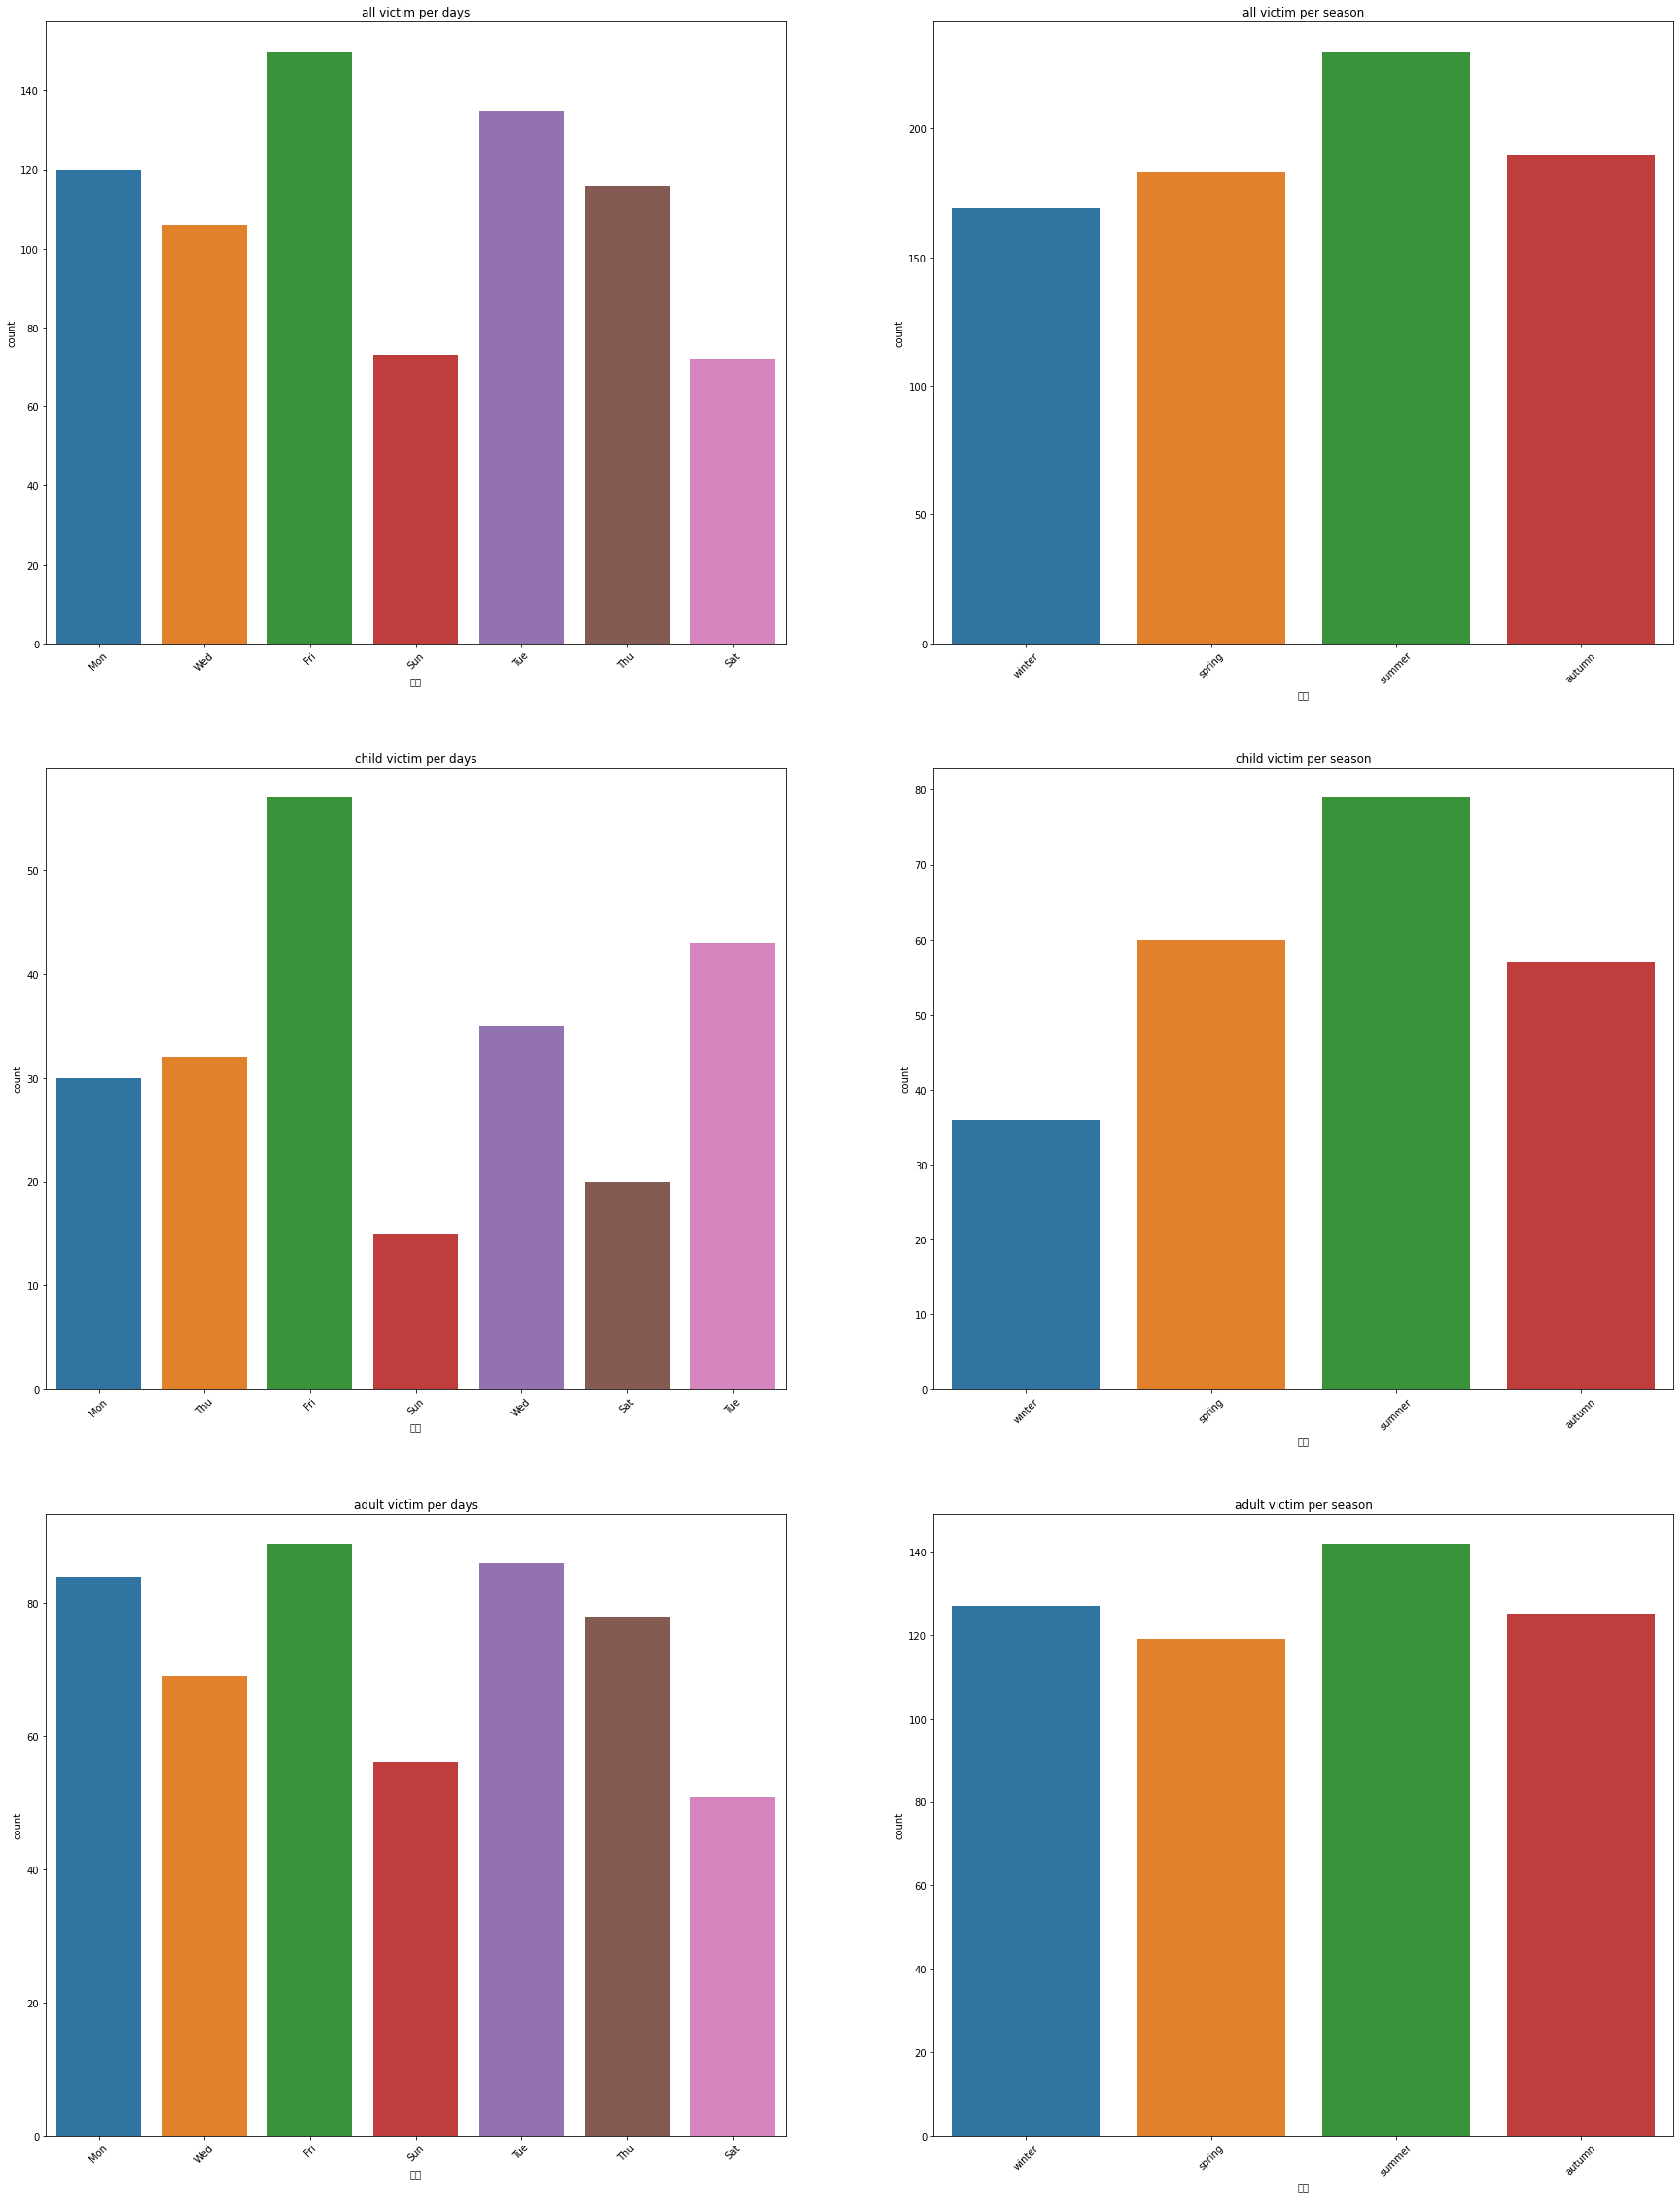

In [ ]:
# 요일별, 계절별 사고 건수
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(30, 40), squeeze=False)
chart0 = sns.countplot(acc['요일'], ax=axs[0][0]) # 요일별 전체 사고 건수
chart0.set_xticklabels(chart0.get_xticklabels(), rotation=45)
chart0.set_title("all victim per days")
chart1 = sns.countplot(acc['계절'], ax=axs[0][1]) # 계절별 전체 사고 건수
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.set_title("all victim per season")
# 어린이의 요일별, 계절별 사고 건수
chart3 = sns.countplot(acc[cond_child]['요일'], ax=axs[1][0]) # 요일별 어린이 사고 건수
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=45)
chart3.set_title("child victim per days")
chart4 = sns.countplot(acc[cond_child]['계절'], ax=axs[1][1]) # 계절별 어린이 사고 건수
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=45)
chart4.set_title("child victim per season")
# 성인의 요일별, 계절별 사고 건수
chart5 = sns.countplot(acc[cond_adult]['요일'], ax=axs[2][0]) # 요일별 성인 사고 건수
chart5.set_xticklabels(chart5.get_xticklabels(), rotation=45)
chart5.set_title("adult victim per days")
chart6 = sns.countplot(acc[cond_adult]['계절'], ax=axs[2][1]) # 계절별 성인 사고 건수
chart6.set_xticklabels(chart6.get_xticklabels(), rotation=45)
chart6.set_title("adult victim per season")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)


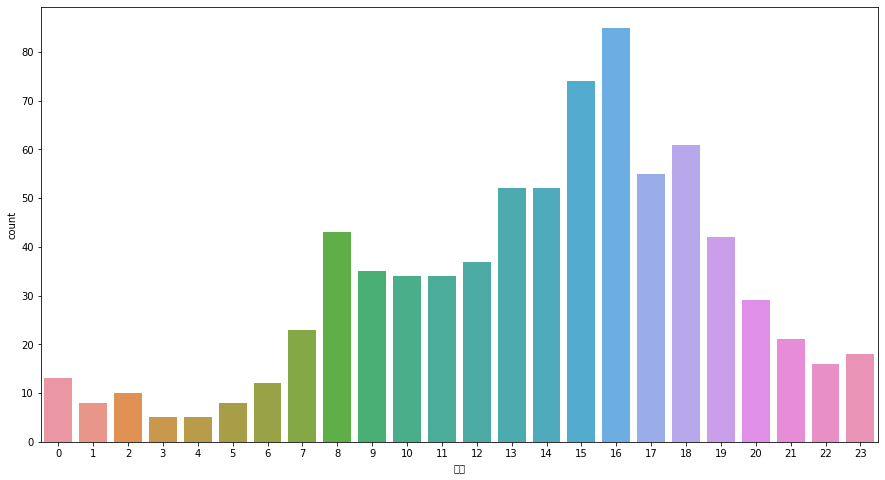

In [ ]:
# 시간대별 사고 건수
plt.figure(figsize=(15,8))
sns.countplot(acc['시간'].astype('int').sort_values())

(0.9, 1.2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text

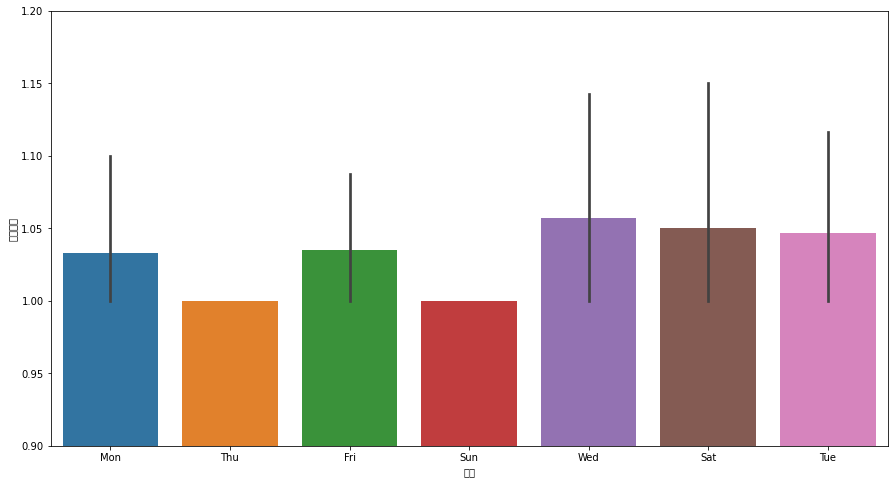

In [ ]:
# 요일별 어린이 피해자 수
plt.figure(figsize=(15,8))
sns.barplot(x=acc[cond_child]['요일'], y=acc[cond_child]['피해자수'])
plt.ylim(0.9,1.2)

(0.9, 1.2)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51208 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text

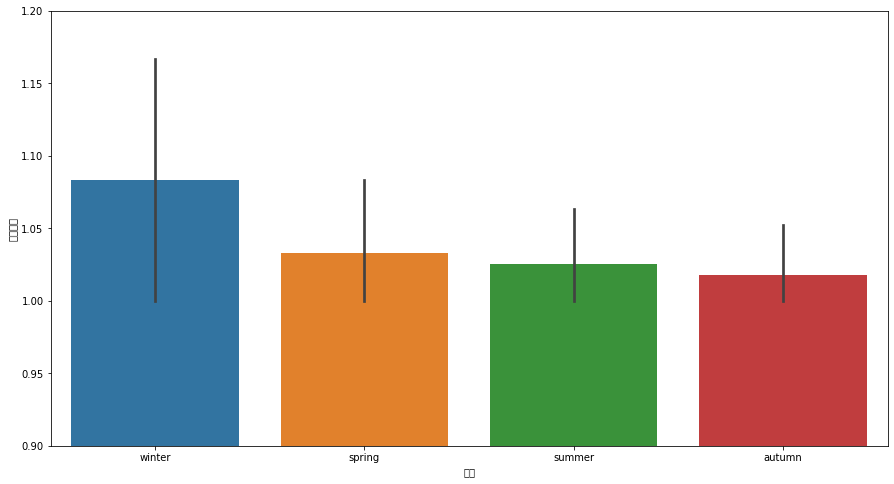

In [ ]:
# 계절별 어린이 피해자 수
plt.figure(figsize=(15,8))
sns.barplot(x=acc[cond_child]['계절'], y=acc[cond_child]['피해자수'])
plt.ylim(0.9,1.2)

(0.8, 3.0)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text

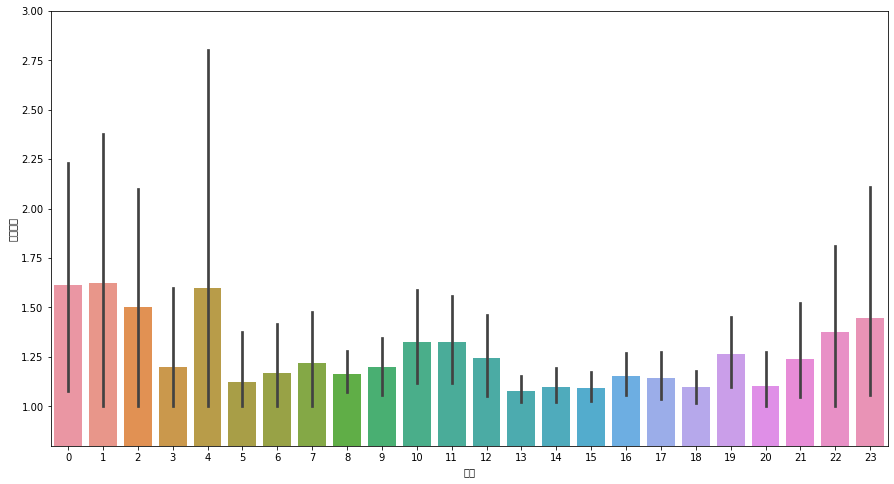

In [ ]:
# 시간대별 피해자 수
plt.figure(figsize=(15,8))
sns.barplot(x=acc['시간'].astype('int').sort_values(), y=acc['피해자수'])
plt.ylim(0.8,3.0)

In [ ]:
acc['노면상태'].value_counts()

dry      670
humid     70
etc       29
ice        3
Name: 노면상태, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_te

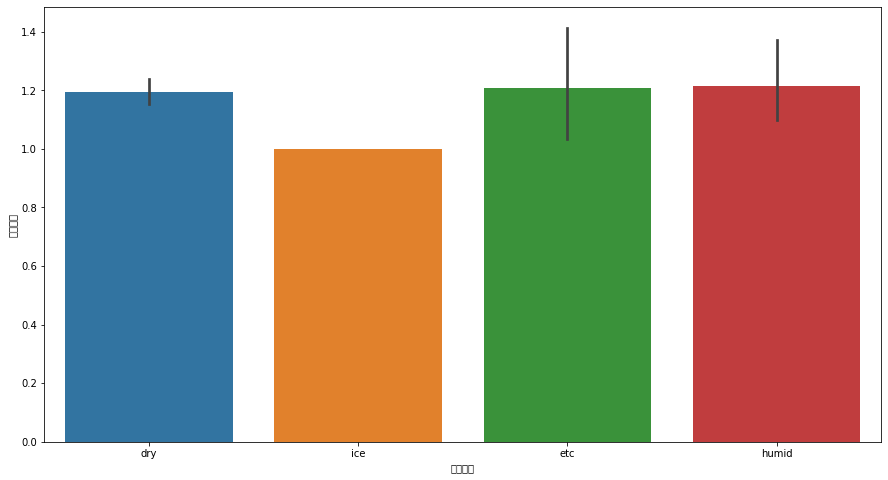

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=acc['노면상태'], y=acc['피해자수'])

# 2.

In [ ]:
region_grouped = acc.groupby('시군구')['시군구'].count()
region_grouped.sort_values(inplace=True, ascending=False)
region_grouped_df = pd.DataFrame(region_grouped)
region_grouped_df.columns = ['count']
region_grouped_df.reset_index(drop=False, inplace=True)
region_grouped_df

,시군구,count
0,성북구,75
1,도봉구,69
2,강서구,63
3,동작구,55
4,구로구,51
5,서초구,45
6,영등포구,39
7,광진구,33
8,은평구,31
9,양천구,30


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

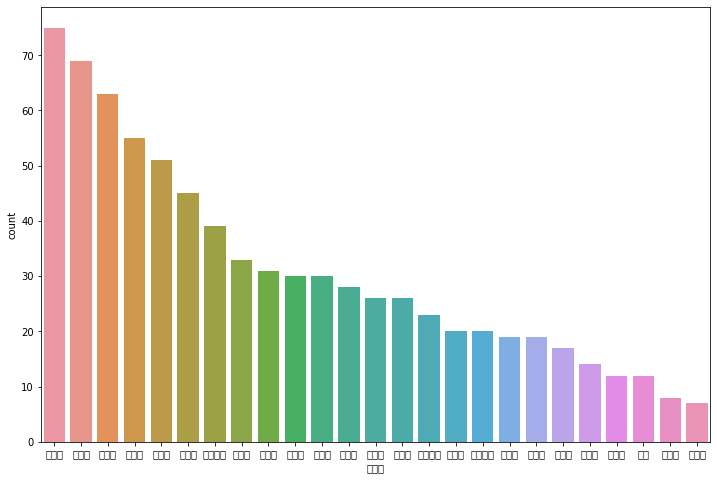

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=region_grouped_df['시군구'], y=region_grouped_df['count'])

# 3, 4.

In [ ]:
acc['사고유형'].value_counts()

차대사람    388
차대차     384
Name: 사고유형, dtype: int64

In [ ]:
acc['피해운전자 상해정도'].value_counts()

ligtht     436
heavy      207
none        77
injured     41
dead         6
etc          5
Name: 피해운전자 상해정도, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'acc category per injured')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54644 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

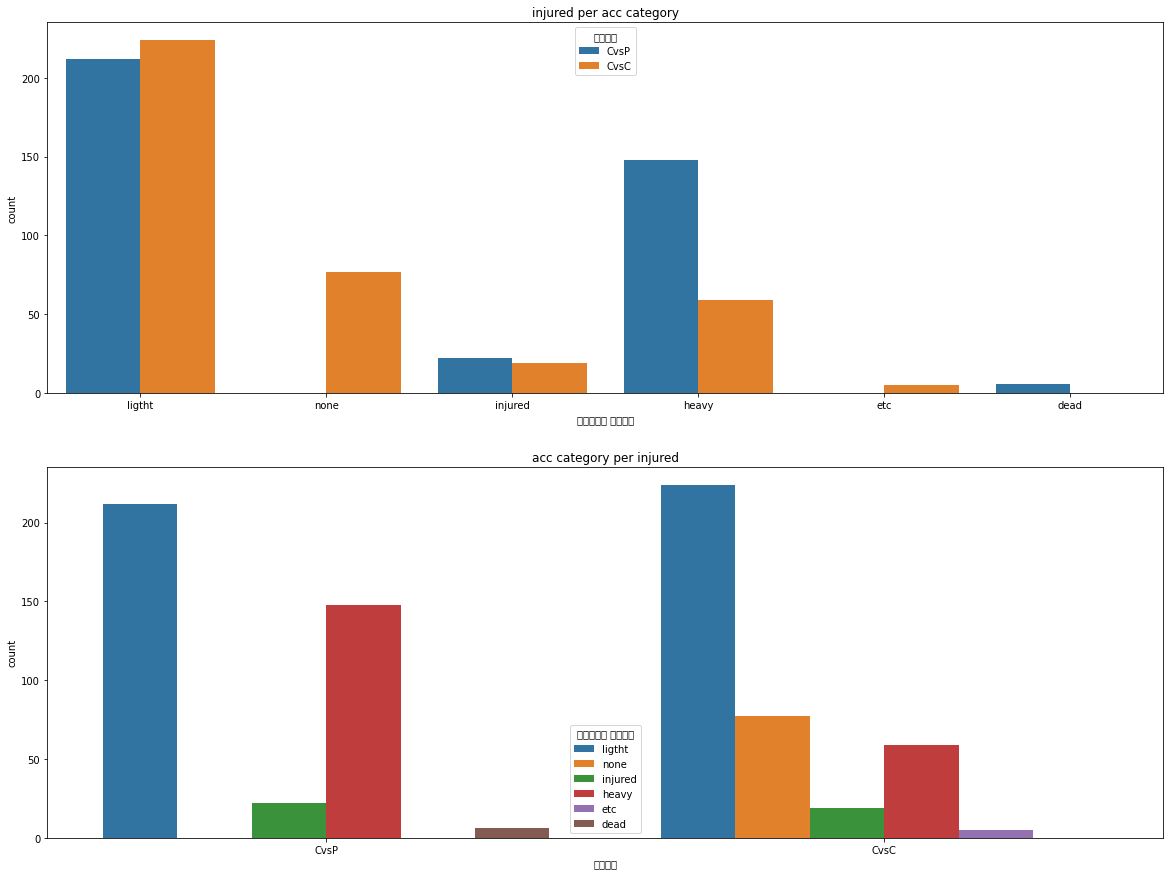

In [ ]:
# 사고유형 - CvsC 는 차대차, CvsP는 차대사람
# 피해운전자 상해정도 - light:경상, heavy:중상, injure:부상신고, etc:기타, dead:사망
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 15), squeeze=False)
chart0 = sns.countplot(acc['피해운전자 상해정도'], hue=acc['사고유형'], ax=axs[0][0]) # 상해정도별 사고유형
chart0.set_title("injured per acc category")
chart1 = sns.countplot(acc['사고유형'], hue=acc['피해운전자 상해정도'], ax=axs[1][0]) # 사고유형별 상해정도
chart1.set_title("acc category per injured")

# 5.

In [ ]:
print(f'child acc rate : {round(len(acc[cond_child]) / len(acc), 2)}%')
print(f'teen acc rate : {round(len(acc[cond_teen]) / len(acc), 2)}%')
print(f'adult acc rate : {round(len(acc[cond_adult]) / len(acc), 2)}%')

child acc rate : 0.3%
teen acc rate : 0.03%
adult acc rate : 0.66%


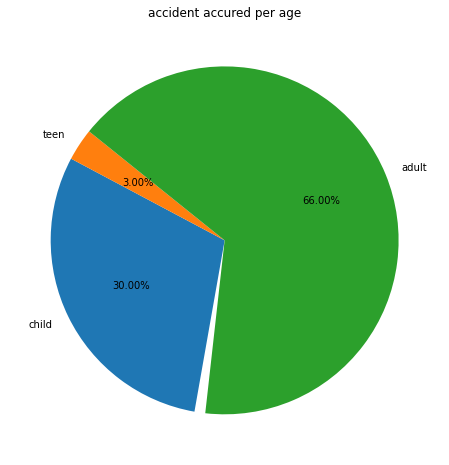

In [ ]:
ratio = [round(len(acc[cond_child]) / len(acc), 2), round(len(acc[cond_teen]) / len(acc), 2), round(len(acc[cond_adult]) / len(acc), 2)]
labels = ['child', 'teen', 'adult']
plt.figure(figsize=(12,8))
plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=260, counterclock=False)
plt.title("accident accured per age")
plt.show()

# 6.

In [ ]:
cond_male_offender = (acc['가해운전자 성별'] == '남')
cond_female_offender = (acc['가해운전자 성별'] == '여')

In [ ]:
monthly_grouped = acc.groupby('월')['월'].count()
monthly_grouped_df = pd.DataFrame(monthly_grouped)
monthly_grouped_df.columns = ['count']
monthly_grouped_df.reset_index(drop=False, inplace=True)

monthly_male_grouped = acc[cond_male_offender].groupby('월')['월'].count()
monthly_male_grouped_df = pd.DataFrame(monthly_male_grouped)
monthly_male_grouped_df.columns = ['male_count']
monthly_male_grouped_df.reset_index(drop=False, inplace=True)

monthly_female_grouped = acc[cond_female_offender].groupby('월')['월'].count()
monthly_female_grouped_df = pd.DataFrame(monthly_female_grouped)
monthly_female_grouped_df.columns = ['female_count']
monthly_female_grouped_df.reset_index(drop=False, inplace=True)

monthly_grouped_df = monthly_grouped_df.merge(monthly_male_grouped_df, on='월', how='left')
monthly_grouped_df = monthly_grouped_df.merge(monthly_female_grouped_df, on='월', how='left')
monthly_grouped_df

,월,count,male_count,female_count
0,1,45,30,15
1,2,52,43,9
2,3,48,37,10
3,4,67,55,10
4,5,68,56,12
5,6,75,53,21
6,7,80,55,25
7,8,75,54,19
8,9,66,52,13
9,10,64,51,11


Text(0.5, 1.0, 'monthly acc accured by female')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


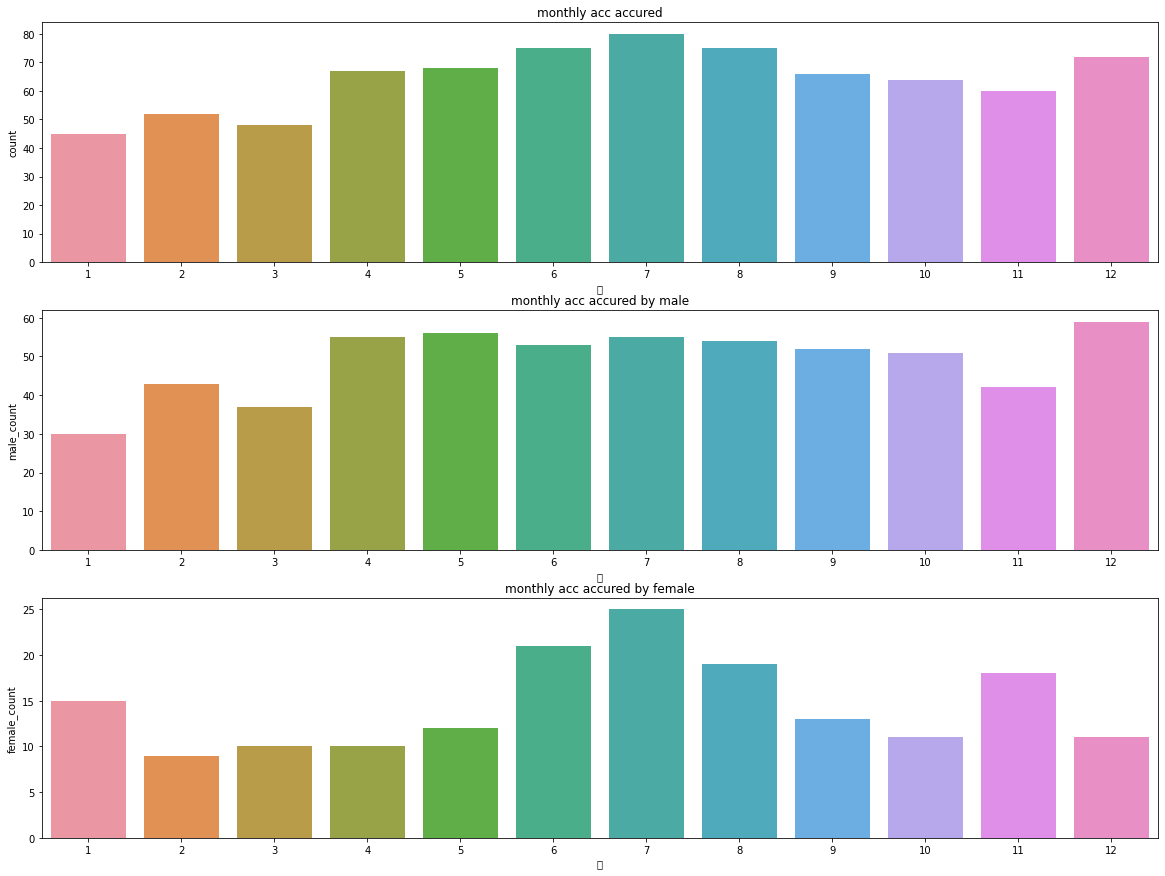

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(20, 15), squeeze=False)
chart0 = sns.barplot(x=monthly_grouped_df['월'], y=monthly_grouped_df['count'], ax=axs[0][0])
chart0.set_title("monthly acc accured")
chart1 = sns.barplot(x=monthly_grouped_df['월'], y=monthly_grouped_df['male_count'], ax=axs[1][0])
chart1.set_title("monthly acc accured by male")
chart2 = sns.barplot(x=monthly_grouped_df['월'], y=monthly_grouped_df['female_count'], ax=axs[2][0])
chart2.set_title("monthly acc accured by female")